In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [2]:
# Read CSV file
df = pd.read_csv('myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# drop the column 'MYOPIC'
X = df.drop('MYOPIC', axis=1)
y = df['MYOPIC'].values


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
# Train the scaler on the training set
X_scaled = scaler.fit_transform(X_train)
X_scaled[0]

array([-0.43962696,  0.49383529, -0.00946716,  1.11947422, -0.8776419 ,
       -0.18528509, -0.26986031, -0.90634417, -0.66175638, -0.67299709,
        1.05710814, -0.69016288, -1.02045201,  0.99595958])

# Apply Dimensionality Reduction

In [6]:
# perform dimensionality reduction with PCA
pca = PCA(n_components=2)
# fit the PCA model to the scaled data
myopia_pca = pca.fit_transform(X_scaled)
#Getting the explained variance ratio
pca.explained_variance_ratio_.sum()

0.37544226651951484

In [7]:
# Getting the shape of features after reduction
myopia_pca.shape

(494, 2)

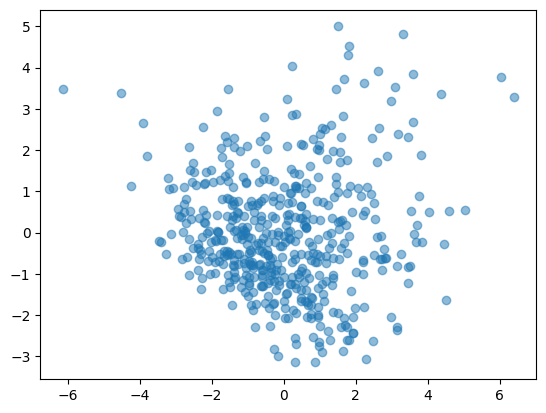

In [8]:
# Further reduce the dimensions with t-SNE and visually inspect the results
xs = myopia_pca[:,0]
ys = myopia_pca[:,1]
plt.scatter(xs, ys, alpha=0.5)
plt.show()


/Users/siyuanliang/BootCamp_University/Unsupervised_Learning/20-Unsupervised-Learning/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siyuanliang/BootCamp_University/Unsupervised_Learning/20-Unsupervised-Learning/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siyuanliang/BootCamp_University/Unsupervised_Learning/20-Unsupervised-Learning/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siyuanliang/BootCamp_University/Unsupervised_Learning/20-

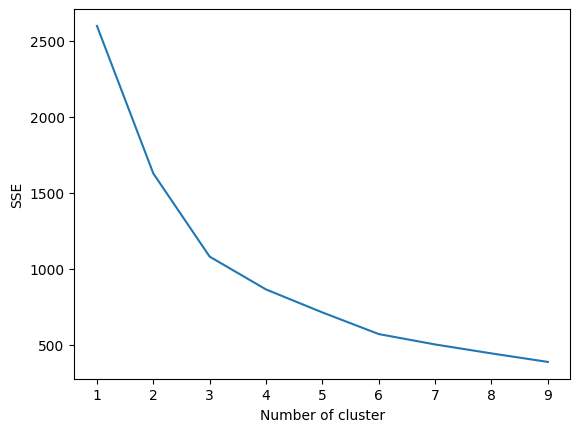

In [9]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:
# 1. Run k-means clustering on the dataset with different values of k.
# 2. For each k, calculate the sum of squared errors (SSE).
# 3. Plot the SSE values for each k.
# 4. Identify the elbow in the plot.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(myopia_pca)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()